In [14]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [16]:
data = pd.read_csv('C:/Users/HP/Documents/Indus/Subjects/DS/Project/Old Car Price Prediction/Training/car_price.csv')
data.head()


,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [17]:
data = data.drop(data.columns[0], axis=1)
data.sample(8)


,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
2714,Jeep Compass 1.4 Limited Plus BSIV,12.80 Lakh,"34,000 kms",Petrol,Automatic,1st Owner,2018,799 cc,5 Seats
2145,Toyota Etios VD,3.30 Lakh,"80,000 kms",Diesel,Manual,2nd Owner,2011,1199 cc,4 Seats
4524,Hyundai Creta SX Opt Diesel,18.50 Lakh,"9,000 kms",Diesel,Manual,1st Owner,2021,2393 cc,5 Seats
5,Volkswagen Vento 1.2 TSI Highline AT,7.66 Lakh,"49,719 kms",Petrol,Automatic,1st Owner,2017,1197 cc,5 Seats
5021,Toyota Etios GD SP,2.73 Lakh,"2,12,367 kms",Diesel,Manual,1st Owner,2012,1799 cc,4 Seats
994,Maruti Swift VDI,3.40 Lakh,"86,000 kms",Diesel,Manual,1st Owner,2011,796 cc,5 Seats
2218,Volkswagen Vento 1.5 TDI Highline AT,7.25 Lakh,"1,14,996 kms",Diesel,Automatic,1st Owner,2016,1199 cc,5 Seats
263,Honda Jazz 1.2 SV i VTEC,5.40 Lakh,"42,000 kms",Petrol,Manual,1st Owner,2017,1199 cc,5 Seats


In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


In [19]:
data.duplicated().sum()
data[data.duplicated()]


,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
1151,Audi Q5 3.0 TDI Quattro,9.95 Lakh,"68,000 kms",Diesel,Automatic,3rd Owner,2011,2967 cc,5 Seats
1297,Mercedes-Benz GLS 350d Grand Edition,59.50 Lakh,"45,000 kms",Diesel,Automatic,2nd Owner,2016,2499 cc,5 Seats
1351,Honda Jazz 1.2 V AT i VTEC,6.90 Lakh,"27,200 kms",Petrol,Automatic,1st Owner,2017,1462 cc,5 Seats
1352,Mahindra Thar CRDe,7.72 Lakh,"46,365 kms",Diesel,Manual,1st Owner,2017,1461 cc,5 Seats
1353,Maruti Ciaz Alpha BSIV,8.72 Lakh,"82,496 kms",Petrol,Manual,1st Owner,2019,1248 cc,5 Seats
...,...,...,...,...,...,...,...,...,...
5301,Mercedes-Benz E-Class E250 CDI Avantgarde,25.90 Lakh,"60,625 kms",Diesel,Automatic,2nd Owner,2016,1197 cc,5 Seats
5318,Mercedes-Benz E-Class Exclusive E 220d,76.25 Lakh,"2,000 kms",Diesel,Automatic,1st Owner,2022,1950 cc,5 Seats
5322,BMW X3 xDrive 20d Luxury Line,60 Lakh,"19,000 kms",Diesel,Automatic,1st Owner,2021,1997 cc,5 Seats
5338,Volvo S90 D4 Inscription BSIV,44.75 Lakh,"20,000 kms",Diesel,Automatic,1st Owner,2018,1950 cc,5 Seats


In [20]:
df = data.copy()

# Remove duplicity
df = df.drop_duplicates().reset_index(drop=True)

# Var: car_prices_in_rupee - remove Lahk and convert for float type
df[['price', 'multiply']] = data['car_prices_in_rupee'].str.split(' ', 1, expand=True)
df.drop('car_prices_in_rupee', axis=1, inplace=True)


In [21]:
# Var: kms_driven - removing kms and convert to int
df['kms_driven'] = df['kms_driven'].str.replace(' kms', '')
df['kms_driven'] = df['kms_driven'].str.replace(',', '').astype('int')

# Var: manufacture -  convert to int
df['manufacture'] = df['manufacture'].astype('int')

# Var: engine - remove cc and convert to int
df['engine'] = df['engine'].str.replace(' cc', '').astype('int')

#Var: Seats - remove seats and convert to int
df['Seats'] = df['Seats'].str.replace(' Seats', '').astype('int')

# Var price - convert to float: 
df['price'] = df['price'].str.replace(',', '.').astype('float')


In [22]:
df.sample(4)


,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,multiply
199,Maruti Swift LDI,143000,Diesel,Manual,2nd Owner,2011,1248,5,2.10,Lakh
4496,Honda Jazz 1.2 S AT i VTEC,77038,Petrol,Automatic,2nd Owner,2015,1461,5,13.00,Lakh
1615,Honda Jazz 1.2 VX i VTEC,45000,Petrol,Manual,1st Owner,2017,1598,5,9.65,Lakh
355,Honda CR-V 2.0L 2WD AT,48019,Petrol,Automatic,1st Owner,2017,1997,5,19.75,Lakh


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      5436 non-null   object 
 1   kms_driven    5436 non-null   int32  
 2   fuel_type     5436 non-null   object 
 3   transmission  5436 non-null   object 
 4   ownership     5436 non-null   object 
 5   manufacture   5436 non-null   int32  
 6   engine        5436 non-null   int32  
 7   Seats         5436 non-null   int32  
 8   price         5436 non-null   float64
 9   multiply      5314 non-null   object 
dtypes: float64(1), int32(4), object(5)
memory usage: 339.9+ KB


In [24]:
df.describe()


,kms_driven,manufacture,engine,Seats,price
count,5436.000000,5436.000000,5436.000000,5436.000000,5436.000000
mean,63343.080390,2015.437822,1532.926784,5.252208,11.610213
std,41961.414723,3.938207,580.933381,0.722515,16.628434
min,250.000000,1995.000000,0.000000,2.000000,1.000000
25%,33234.000000,2013.000000,1197.000000,5.000000,3.240000
50%,59290.000000,2016.000000,1396.000000,5.000000,5.550000
75%,84363.000000,2018.000000,1950.000000,5.000000,10.502500
max,560000.000000,2022.000000,5950.000000,8.000000,99.999000


In [25]:
df = df[~df.isin(df.loc[df['engine']==df['engine'].min()])].reset_index(drop=True)


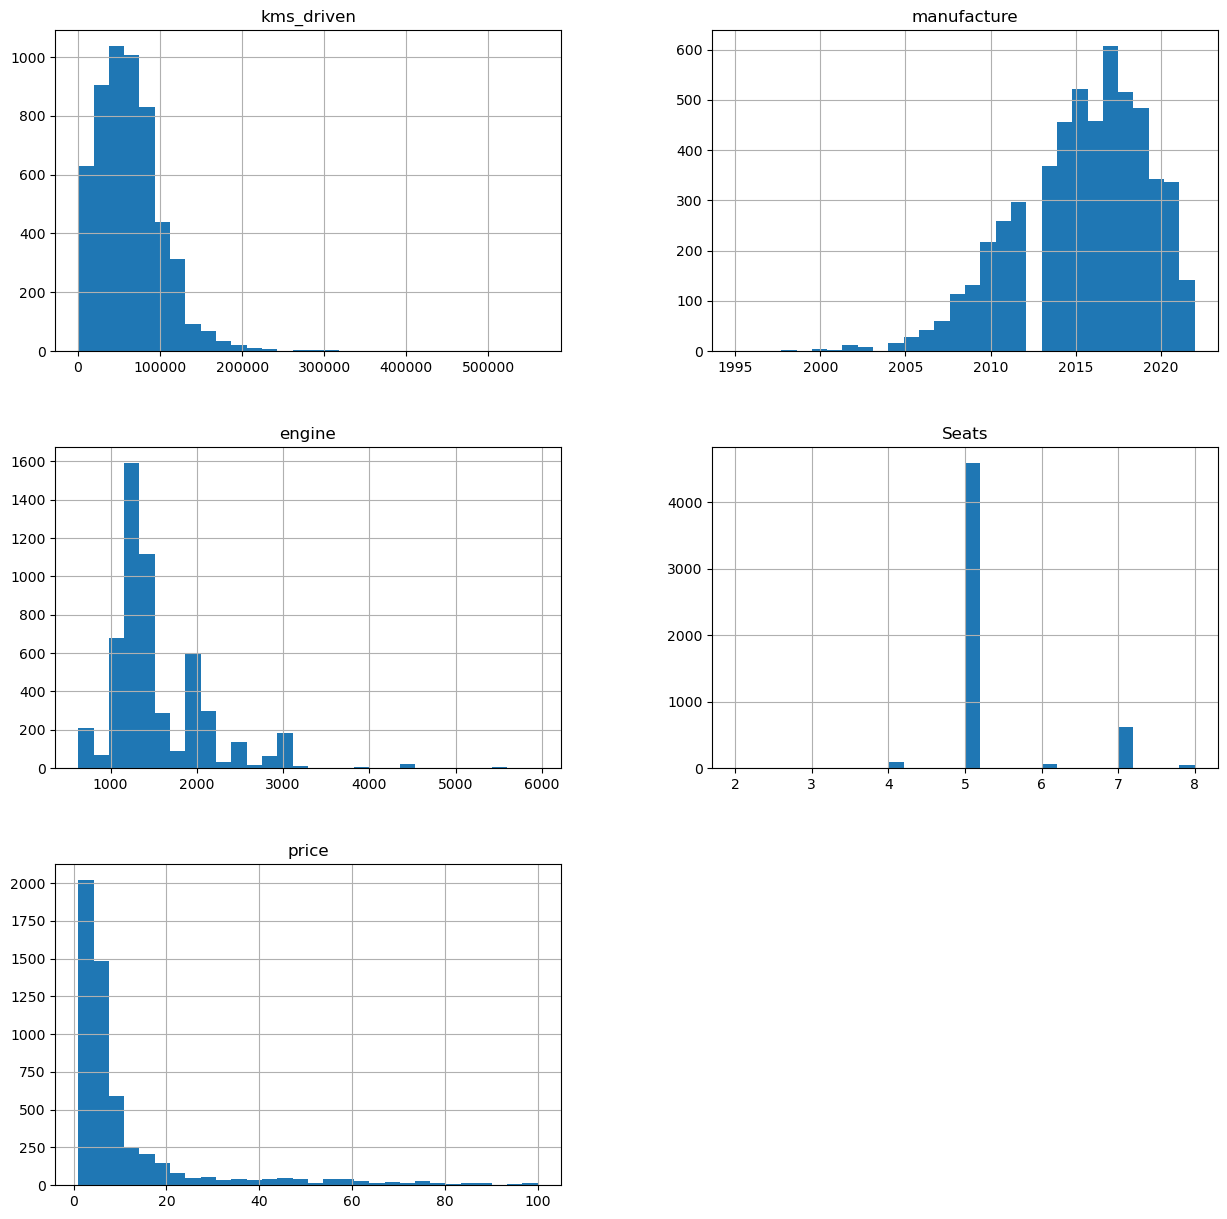

In [26]:
df.hist(figsize = (15,15), bins = 30) 
plt.show()
#plotting histogram

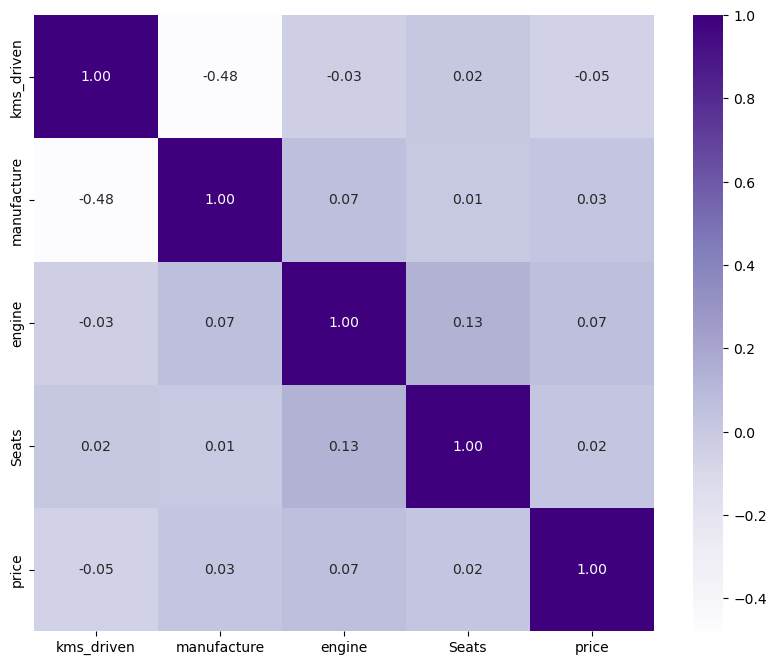

In [27]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'Purples', annot = True, fmt = '.2f');
# Verify the heatmap of correlations 


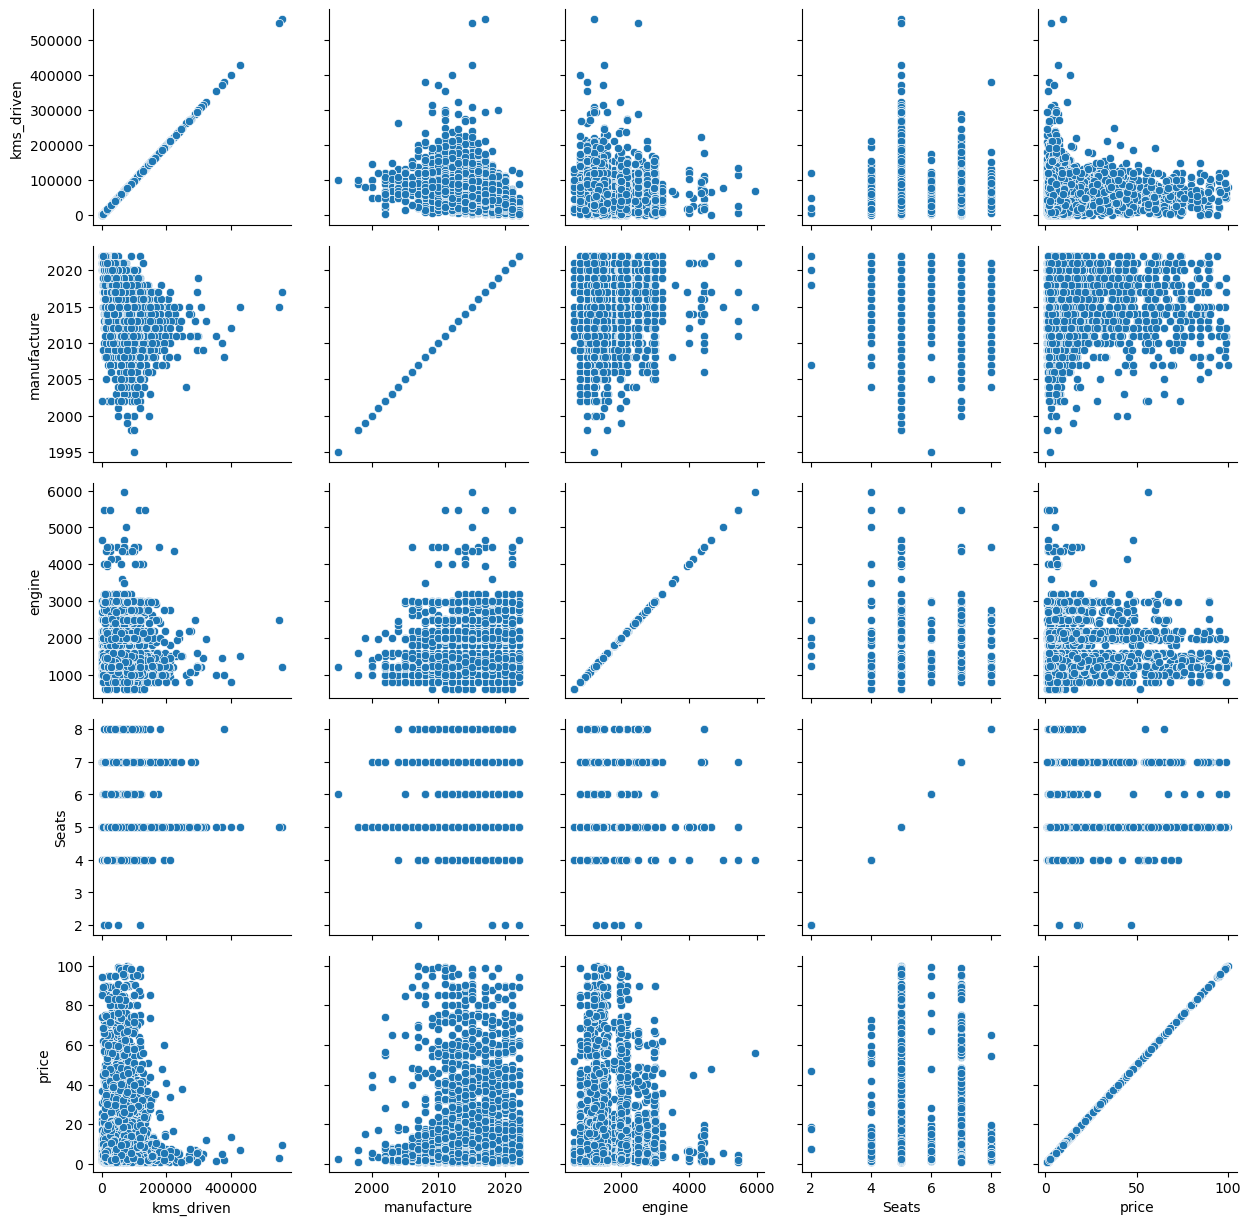

In [28]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)
# Plot correlations



In [29]:
df.dtypes[df.dtypes == 'object']


car_name        object
fuel_type       object
transmission    object
ownership       object
multiply        object
dtype: object

In [30]:
df[df.dtypes[df.dtypes == 'object'].index.values].describe()


,car_name,fuel_type,transmission,ownership,multiply
count,5424,5424,5424,5424,5302
unique,1893,5,2,6,2
top,Maruti Alto 800 LXI,Petrol,Manual,1st Owner,Lakh
freq,53,2928,3913,3666,5250


In [31]:
df = df[df['multiply']=='Lakh'].reset_index(drop=True)


In [32]:
df['car_name'] = df['car_name'].str.split().str[0]


In [33]:
df[df.dtypes[df.dtypes == 'object'].index.values].describe()


,car_name,fuel_type,transmission,ownership,multiply
count,5250,5250,5250,5250,5250
unique,32,5,2,6,1
top,Maruti,Petrol,Manual,1st Owner,Lakh
freq,1320,2830,3778,3557,5250


<AxesSubplot:xlabel='car_name'>

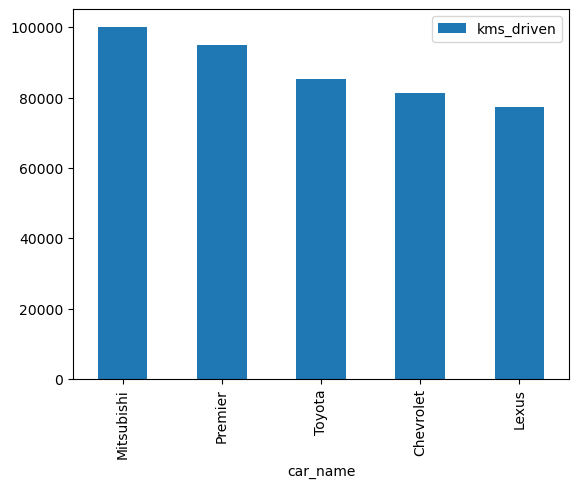

In [34]:
mean_km_carname = df.groupby(['car_name']).agg({'kms_driven':'mean'}).sort_values('kms_driven', ascending=False).head(5)

mean_km_carname.plot.bar()


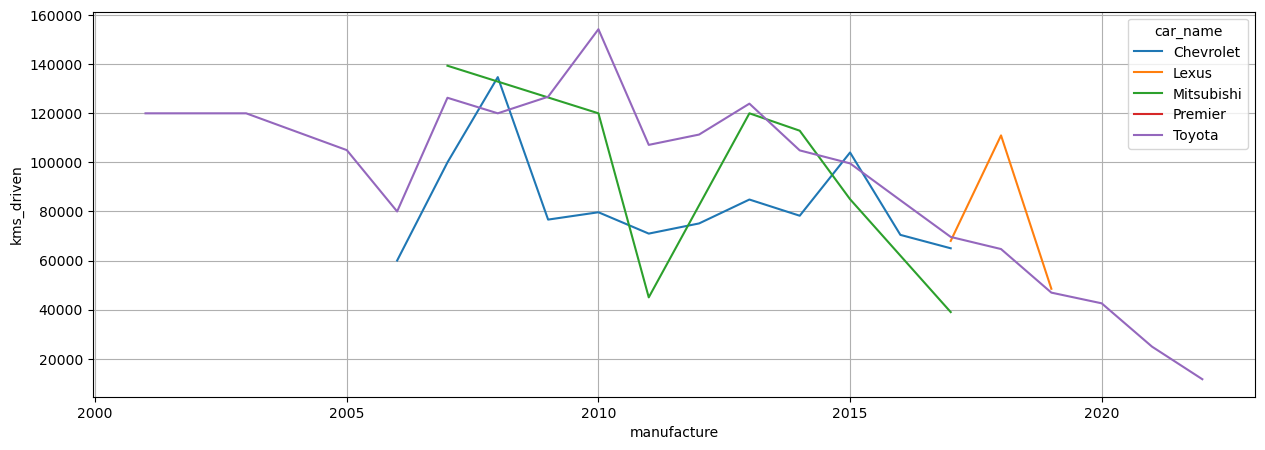

In [35]:
df_plot = df[df['car_name'].isin(mean_km_carname.index.values)].groupby(['car_name', 'manufacture']).agg({'kms_driven':'mean'})
plt.figure(figsize=(15,5))
sns.lineplot(data=df_plot, x='manufacture', y='kms_driven', hue = 'car_name')
plt.grid('on')


In [36]:
df[df['car_name']=='Premier']


,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,multiply
472,Premier,95000.0,Petrol,Manual,1st Owner,2014.0,2523.0,5.0,3.5,Lakh


In [37]:
df.groupby('fuel_type').agg({'price':'mean'}).sort_values('price', ascending=False)


,price
fuel_type,
Diesel,11.881248
Electric,11.735833
Lpg,9.166087
Petrol,8.935841
Cng,7.982727


<AxesSubplot:xlabel='fuel_type'>

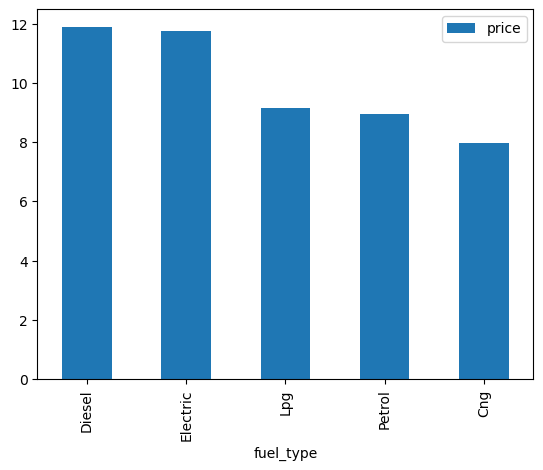

In [38]:
df.groupby('fuel_type').agg({'price':'mean'}).sort_values('price', ascending=False).plot.bar()


<AxesSubplot:xlabel='transmission'>

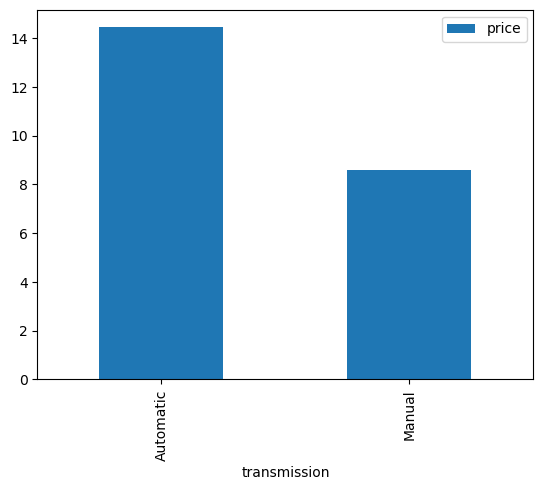

In [39]:
df.groupby('transmission').agg({'price':'mean'}).sort_values('price', ascending=False).plot.bar()


In [40]:
df['engine'].describe()


count    5250.000000
mean     1537.160952
std       578.450709
min       624.000000
25%      1197.000000
50%      1396.000000
75%      1950.000000
max      5950.000000
Name: engine, dtype: float64

In [41]:
df['engine_cat'] = pd.cut(df['engine'],
                              bins=[600., 1200., 2000, np.inf],
                              labels=['lower', 'medium', 'high'])


<AxesSubplot:xlabel='engine_cat'>

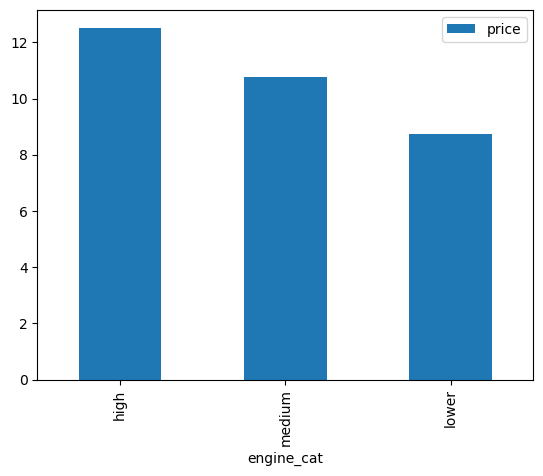

In [42]:
df.groupby('engine_cat').agg({'price':'mean'}).sort_values('price', ascending=False).plot.bar()


<AxesSubplot:xlabel='ownership'>

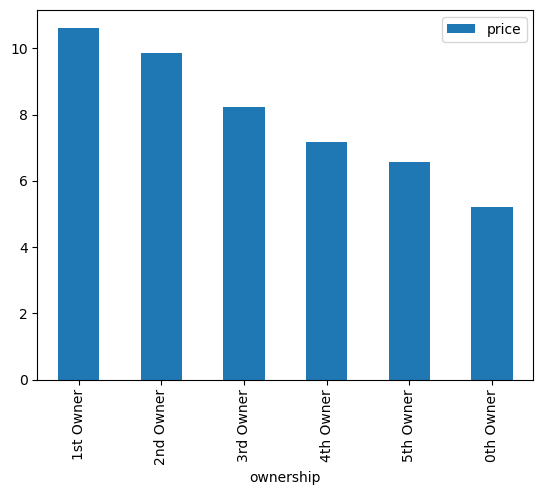

In [43]:
df.groupby('ownership').agg({'price':'mean'}).sort_values('price', ascending=False).plot.bar()


In [44]:
df_model = df.copy()
select_var = ['kms_driven', 'fuel_type', 'transmission', 'ownership', 'engine_cat', 'Seats', 'price']
df_model = df_model[select_var]


In [45]:
df_model.head()


,kms_driven,fuel_type,transmission,ownership,engine_cat,Seats,price
0,86226.0,Diesel,Manual,1st Owner,medium,5.0,10.03
1,13248.0,Petrol,Automatic,1st Owner,medium,5.0,12.83
2,60343.0,Petrol,Automatic,1st Owner,high,5.0,16.40
3,26696.0,Petrol,Automatic,1st Owner,lower,5.0,7.77
4,69414.0,Petrol,Manual,1st Owner,lower,5.0,5.15


In [46]:
df_model['kms_driven'] = MinMaxScaler().fit_transform(df_model['kms_driven'].values.reshape(len(df_model), 1))


In [47]:
dic_fuel_type = {'Diesel': 0, 'Petrol': 1, 'Cng': 2, 'Lpg': 3, 'Electric': 4}
dic_transmission = {'Manual': 0, 'Automatic': 1}
dic_ownership = {'1st Owner': 0, '2nd Owner': 1, '3rd Owner': 2, '4th Owner': 3, '5th Owner': 4, '0th Owner': 5}
dic_engine_cat = {'lower': 0, 'medium': 1, 'high': 2}

df_model.fuel_type = df_model.fuel_type.map(dic_fuel_type)
df_model.transmission = df_model.transmission.map(dic_transmission)
df_model.ownership = df_model.ownership.map(dic_ownership)
df_model.engine_cat = df_model.engine_cat.map(dic_engine_cat)


In [48]:
df_model.head()


,kms_driven,fuel_type,transmission,ownership,engine_cat,Seats,price
0,0.153597,0,0,0,1,5.0,10.03
1,0.023221,1,1,0,1,5.0,12.83
2,0.107357,1,1,0,2,5.0,16.40
3,0.047246,1,1,0,0,5.0,7.77
4,0.123562,1,0,0,0,5.0,5.15


In [49]:
y_target = df_model.price


In [50]:
x_obj = df_model.drop('price', axis=1)


In [51]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x_obj, 
                                                        y_target, 
                                                        test_size = 0.20)


In [52]:
model = sm.OLS(y_treino, X_treino)
results = model.fit()
